In [2]:
from pathlib import Path
import csv
import matplotlib.pyplot as plt

test_path = Path("python_client/experiments/thrust_test_torque_and_thrust_reversed.csv")
time_data = []
thrust_data = []
torque_data = []

with test_path.open() as test_data:
    csv_rows = csv.reader(test_data)

    # Skip preamble
    next(csv_rows)
    next(csv_rows)
    next(csv_rows)
    next(csv_rows)

    for row in csv_rows:
        time = float(row[2])
        thrust = float(row[0])
        torque = float(row[1])

        time_data += [time]
        thrust_data += [thrust]
        torque_data += [torque]

13.66972682


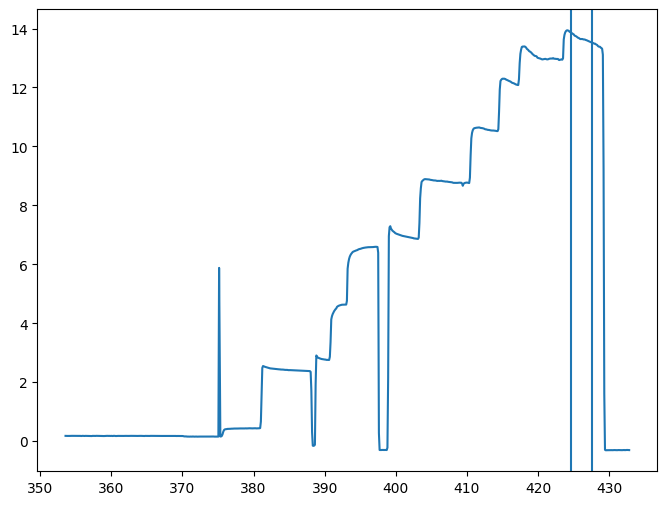

In [96]:
def avg_between(data, start, end):
    return sum(data[start:end]) / (end-start)

START_I = 710
END_I = 740

plt.figure(figsize=(8,6))
plt.plot(time_data, thrust_data)
plt.axvline(time_data[START_I])
plt.axvline(time_data[END_I])

print(avg_between(thrust_data, START_I, END_I))

In [110]:
throttle_to_thrust = {
    0: 0.0,
    10: 0.0,
    20: 0.432,
    30: 2.428,
    40: 4.600,
    50: 6.509,
    60: 8.819,
    70: 10.560,
    80: 12.230,
    90: 13.089,
    100: 13.670,
}

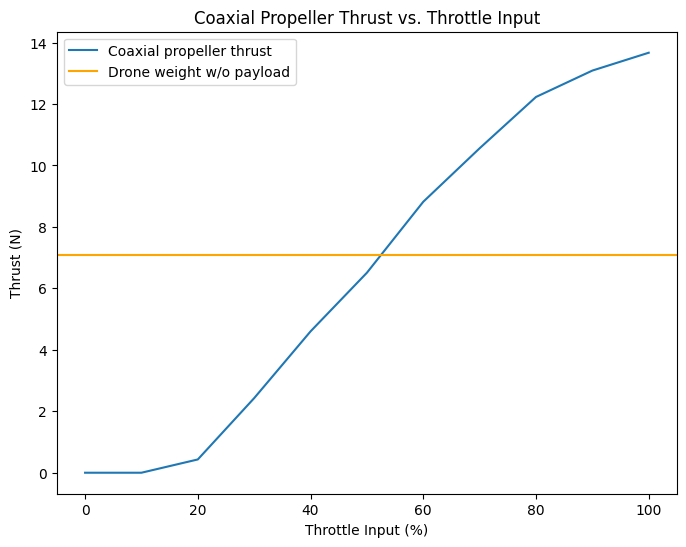

In [129]:
plt.figure(figsize=(8,6))
plt.plot(throttle_to_thrust.keys(), throttle_to_thrust.values(), label="Coaxial propeller thrust")
plt.axhline(y=7.1, color='orange', label="Drone weight w/o payload")
# plt.axhline(y=7.1 + 3.7, color='purple', label="Drone weight w/ payload")
plt.xlabel("Throttle Input (%)")
plt.ylabel("Thrust (N)")
plt.title("Coaxial Propeller Thrust vs. Throttle Input")
plt.legend()

Text(0.5, 1.0, 'Thrust vs. Time')

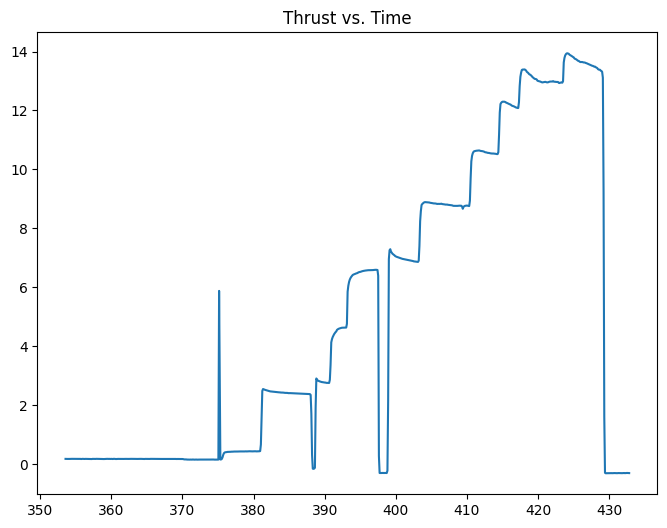

In [131]:
def lpf(data, alpha):
    for i, p in enumerate(data):
        data[i] = p * alpha + data[i-1] * (1 - alpha)

def lerp(data, start_i, end_i):
    width = end_i + 1 - start_i
    for i in range(start_i, start_i + width):
        t = (i - start_i) / width
        lerped = (data[end_i] - data[start_i]) * t + data[start_i]
        data[i] = lerped

# filtered = thrust_data.copy()
# lerp(filtered, 210, 220)
# lerp(filtered, 340, 370)
# lerp(filtered, 430, 490)
# lpf(filtered, 0.5)

plt.figure(figsize=(8,6))
plt.plot(time_data, thrust_data)
plt.title("Thrust vs. Time")